# Project: Natural Gas Price Analysis and Forecasting  
### Business Requirements:  
Our company needs to provide indicative natural gas prices for potential long-term storage contracts. Your task is to analyze historical and current natural gas prices, and produce a forecast for an additional year. You will need to:  

#### Analyze Historical Prices:  

Download and inspect the historical natural gas price data.  
Understand the structure and identify any missing values or anomalies in the data.  
### Forecast Future Prices:  

Develop a model to estimate the price of natural gas for any date in the past.  
Extrapolate the price data for one year into the future.  
Visualize the data to identify any patterns, trends, or seasonal variations.  
Develop an Interactive Tool  


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
prices = pd.read_csv('Nat_Gas.csv')
prices.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [5]:
prices.dtypes

Dates      object
Prices    float64
dtype: object

In [6]:
prices.Dates = pd.to_datetime(prices.Dates)
prices.dtypes


C:\Users\natha\AppData\Local\Temp\ipykernel_18356\3231707205.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  prices.Dates = pd.to_datetime(prices.Dates)


Dates     datetime64[ns]
Prices           float64
dtype: object

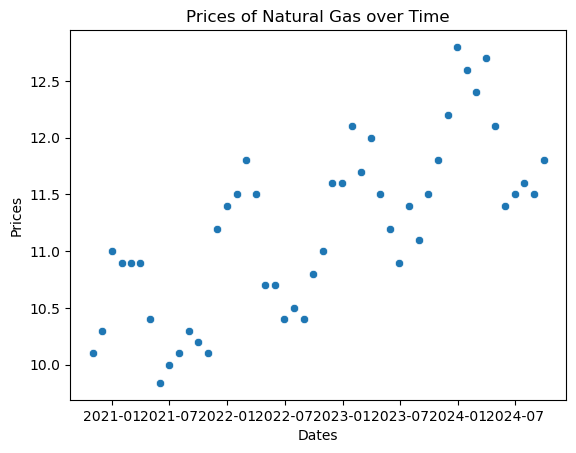

In [41]:
sns.scatterplot(x='Dates', y='Prices', data = prices)
plt.title('Prices of Natural Gas over Time')
plt.show()

In [8]:
prices.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


In [9]:
day_0 = prices.iloc[0,0]
prices['Date Reg']= (prices.Dates - day_0).dt.days
prices.head()

,Dates,Prices,Date Reg
0,2020-10-31,10.1,0
1,2020-11-30,10.3,30
2,2020-12-31,11.0,61
3,2021-01-31,10.9,92
4,2021-02-28,10.9,120


In [10]:
x1 = prices['Date Reg']
y = prices.Prices

In [11]:
prices.corr()

,Dates,Prices,Date Reg
Dates,1.00000,0.72083,1.00000
Prices,0.72083,1.00000,0.72083
Date Reg,1.00000,0.72083,1.00000


Scatter plot and correlation of 0.72 indicate presence of a moderate linear relationship.  
Hence we will perform linear regression.

In [12]:
x = sm.add_constant(x1)
reg = sm.OLS(y,x)
results = reg.fit()

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Prices   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     49.75
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           7.57e-09
Time:                        19:06:57   Log-Likelihood:                -36.703
No. Observations:                  48   AIC:                             77.41
Df Residuals:                      46   BIC:                             81.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2910      0.151     68.244      0.000       9.988      10.595
Date Reg       0.0013      0.000      7.054      0.000       0.001       0.002
==============================================================================
Omnibus:                       18.869   Durbin-Watson:                   0.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.963
Skew:                           0.235   Prob(JB):                        0.138
Kurtosis:                       1.673   Cond. No.                     1.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
results.predict([1,2000])[0]

12.855788323472728

In [61]:
user_input = input('Enter date as mm/dd/yyyy: ')
days_diff = (pd.to_datetime(user_input)-day_0).days
prediction = results.predict([1,days_diff])[0].round(2)
print('Predicted price on ', user_input, 'is ', prediction)

Enter date as mm/dd/yyyy:  09/30/2024


Predicted price on  09/30/2024 is  12.12


The above code when executed allows user to input a date in format mm/dd/yyyy and it returns the predicted price.  


In [27]:
prices.tail()

,Dates,Prices,Date Reg
43,2024-05-31,11.4,1308
44,2024-06-30,11.5,1338
45,2024-07-31,11.6,1369
46,2024-08-31,11.5,1400
47,2024-09-30,11.8,1430


C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


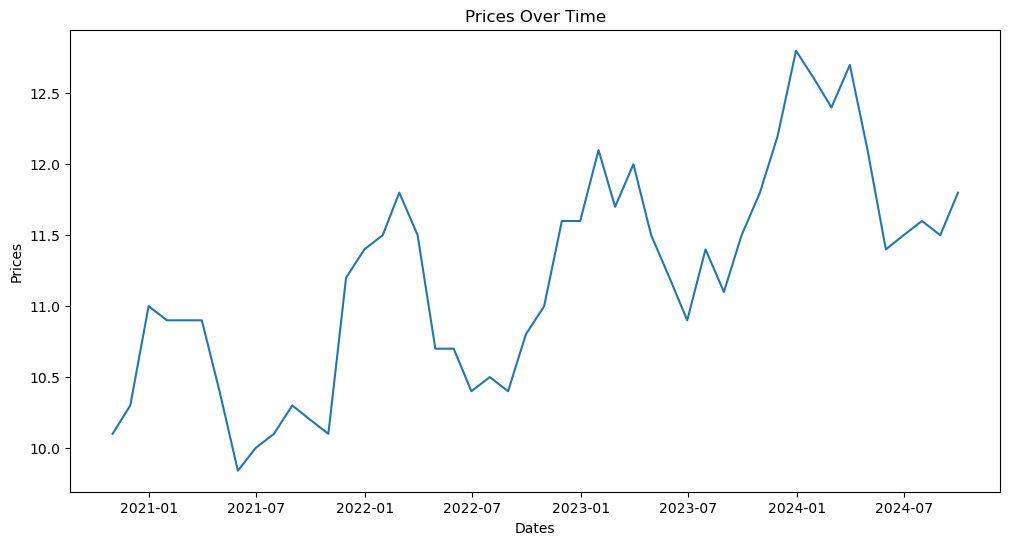

In [38]:
plt.figure(figsize=(12,6))
sns.lineplot(x = 'Dates', y= 'Prices', data= prices)

plt.title('Prices Over Time')
plt.show()

Based on line plot chart we see seasonal variations in price, summer for peaks and winter for troughs.

C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


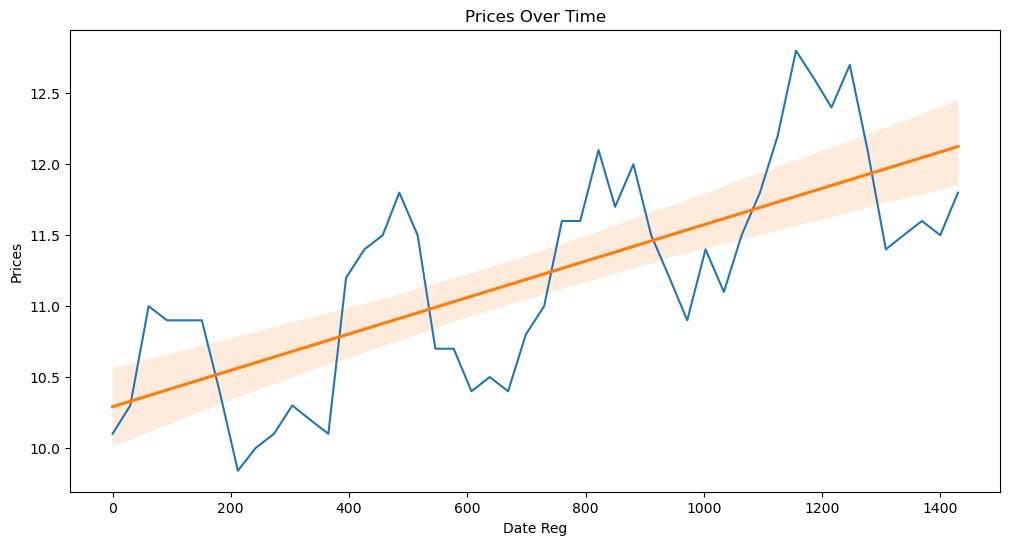

In [42]:
plt.figure(figsize=(12,6))
sns.lineplot(x = 'Date Reg', y= 'Prices', data= prices)
sns.regplot(x = 'Date Reg', y= 'Prices', data= prices, scatter = False)

plt.title('Prices Over Time')
plt.show()

In [49]:
prices.tail()

,Dates,Prices,Date Reg
43,2024-05-31,11.4,1308
44,2024-06-30,11.5,1338
45,2024-07-31,11.6,1369
46,2024-08-31,11.5,1400
47,2024-09-30,11.8,1430


In [103]:
# Generate a sequence of days for forecasting
df = pd.DataFrame({'Column1': [1]*365, 'Column2': range(1431,1796)})

# Make predictions for the forecast days
forecasted_prices = results.predict(df)
forecasted_prices = forecasted_prices.reset_index()

In [104]:
forecasted_prices

,index,0
0,0,12.126118
1,1,12.127400
2,2,12.128682
3,3,12.129965
4,4,12.131247
...,...,...
360,360,12.587772
361,361,12.589055
362,362,12.590337
363,363,12.591619


In [105]:
forecasted_prices['Date Reg']=list(range(1431,1796))


In [106]:
forecasted_prices['Prices'] = forecasted_prices[0]

In [107]:
forecasted_prices

,index,0,Date Reg,Prices
0,0,12.126118,1431,12.126118
1,1,12.127400,1432,12.127400
2,2,12.128682,1433,12.128682
3,3,12.129965,1434,12.129965
4,4,12.131247,1435,12.131247
...,...,...,...,...
360,360,12.587772,1791,12.587772
361,361,12.589055,1792,12.589055
362,362,12.590337,1793,12.590337
363,363,12.591619,1794,12.591619


In [108]:
forecasted_prices = forecasted_prices.drop(['index', 0], axis=1)

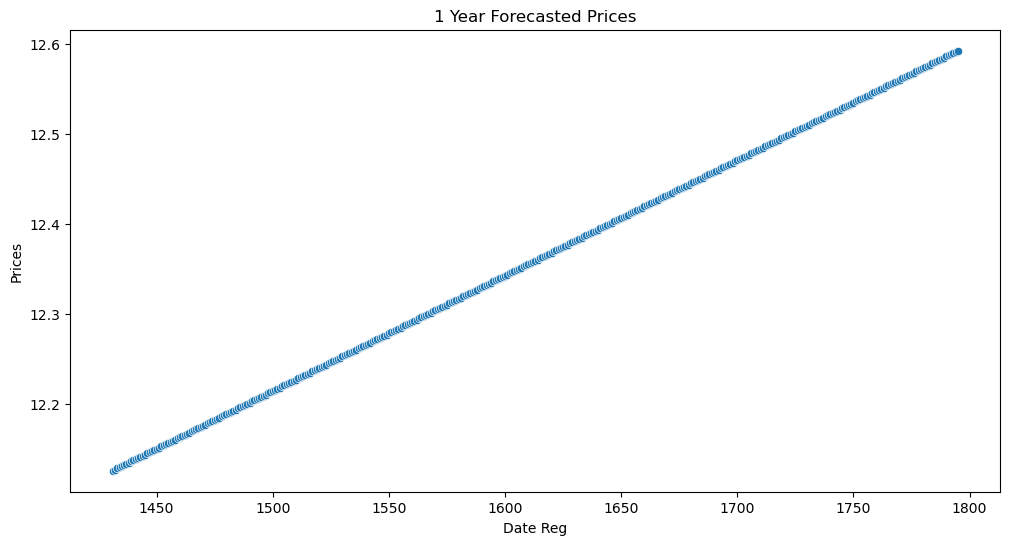

In [113]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Date Reg', y= 'Prices', data = forecasted_prices)
plt.title("1 Year Forecasted Prices")
plt.show()